In [1]:
from utils import *

In [2]:
plot = False
## Delay Line Parameters:
delta_L1 = (72 - 3) * 0.0254
delta_L2 = (72 - 48) * 0.0254
delta_L3 = (48 - 3) * 0.0254
expected_ratios = [
    delta_L1 / delta_L3,  # Ratio 1 (L1 to L3)
    delta_L3 / delta_L2,   # Ratio 2 (L3 to L2)
    delta_L1 / delta_L2,   # Ratio 2 (L3 to L2)
]

In [3]:
threshold = 0.5
tolerance = 1

range_bins = np.array([0, 5, 10, 15, 20, 25])

los_directory_path = "./Data/fig10-los"
los_data_dict = read_data_dict(los_directory_path)
los_dist_data, los_dist_snr = calculate_detection_rate_with_detectable_snr(los_data_dict, tolerance, threshold, "distance", range_bins, expected_ratios, return_snr=True)

In [4]:
nlos_directory_path = "./Data/fig10-nlos"
nlos_data_dict = read_data_dict(nlos_directory_path)
nlos_dist_data, nlos_dist_snr = calculate_detection_rate_with_detectable_snr(nlos_data_dict, tolerance, threshold, "distance", range_bins, expected_ratios, return_snr=True)

Error for 28-0-2-9000-10000-0.00019999999999999998-100: Score too low, signal not periodic!
Error for 28-0-4-9000-10000-0.00019999999999999998-100: Score too low, signal not periodic!


['No Radar', '[0, 5)', '[5, 10)', '[10, 15)', '[15, 20)', '[20, 25)', '[25, 30)'] [1.         1.         1.         1.         1.         0.96363636
 0.66666667] [1.         1.         1.         1.         0.86666667 0.66666667
 0.27272727]


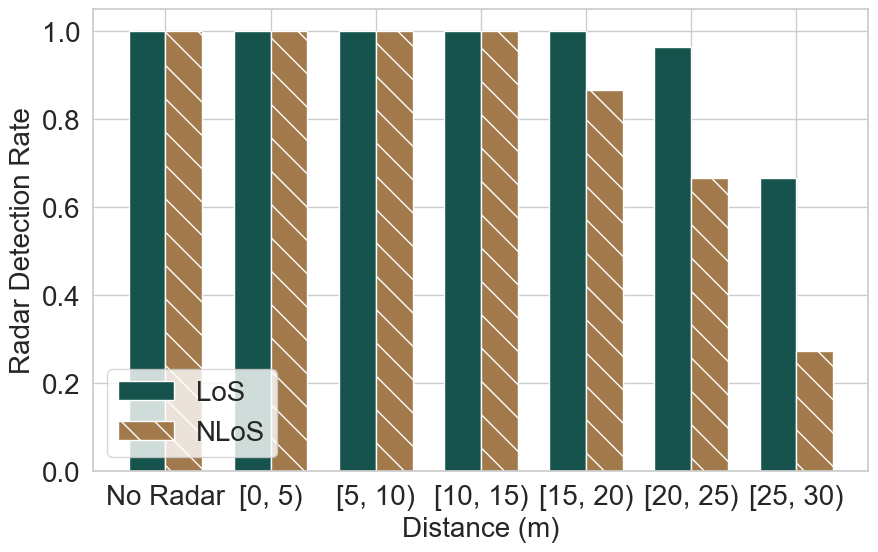

In [5]:
import seaborn as sns
color_map = sns.color_palette("cubehelix", 3).as_hex() # !!!! <- COLOR PALLETTE

# Set seaborn style
sns.set(style="whitegrid")

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 25
matplotlib.rcParams['lines.linewidth'] = 5

fontsize = 20
matplotlib.rcParams['xtick.labelsize'] = fontsize
matplotlib.rcParams['ytick.labelsize'] = fontsize
matplotlib.rcParams['legend.fontsize'] = fontsize
matplotlib.rcParams['axes.labelsize'] = fontsize

plt.figure(figsize = (10, 6))

range_bin_names = [f"[{r}, {r+5})" for r in range_bins]
range_bin_names.insert(0, "No Radar")
# range_bin_names = np.concatenate((np.array(["No Radar"]), range_bin_names))
los_dist_data_extended = np.concatenate(([1], los_dist_data))
nlos_dist_data_extended = np.concatenate(([1], nlos_dist_data))
print(range_bin_names, los_dist_data_extended, nlos_dist_data_extended)

bar_width = 0.35
xloc = np.arange(len(range_bin_names))
plt.bar(xloc, los_dist_data_extended, color=color_map[0], hatch='', label='LoS', width = bar_width)
plt.bar(xloc + bar_width, nlos_dist_data_extended, color=color_map[1], hatch='\\', label='NLoS', width = bar_width)
plt.xticks(xloc + bar_width / 2, range_bin_names)
plt.xlabel("Distance (m)")
plt.ylabel("Radar Detection Rate")
plt.legend(loc = "lower left")

['[0, 5)', '[5, 10)', '[10, 15)', '[15, 20)', '[20, 25)', '[25, 30)'] [37.79138041 25.06943812 23.74424202 18.83762114 14.20641262 17.88778787] [31.04119321 19.92229968 11.29137011 12.26947669  7.26814572  3.74598927]


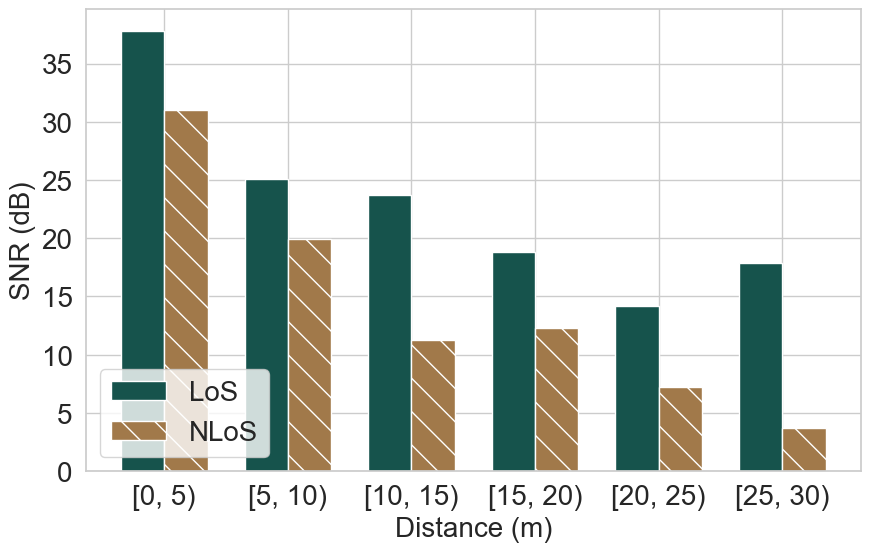

In [6]:
# Set seaborn style
sns.set(style="whitegrid")

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 25
matplotlib.rcParams['lines.linewidth'] = 5

fontsize = 20
matplotlib.rcParams['xtick.labelsize'] = fontsize
matplotlib.rcParams['ytick.labelsize'] = fontsize
matplotlib.rcParams['legend.fontsize'] = fontsize
matplotlib.rcParams['axes.labelsize'] = fontsize

plt.figure(figsize = (10, 6))

range_bin_names = [f"[{r}, {r+5})" for r in range_bins]
los_dist_snr_extended = 10 * np.log10(los_dist_snr)
nlos_dist_snr_extended = 10 * np.log10(nlos_dist_snr)
print(range_bin_names, los_dist_snr_extended, nlos_dist_snr_extended)

bar_width = 0.35
xloc = np.arange(len(range_bin_names))
plt.bar(xloc, los_dist_snr_extended, color=color_map[0], hatch='', label='LoS', width = bar_width)
plt.bar(xloc + bar_width, nlos_dist_snr_extended, color=color_map[1], hatch='\\', label='NLoS', width = bar_width)
plt.xticks(xloc + bar_width / 2, range_bin_names)
plt.xlabel("Distance (m)")
plt.ylabel("SNR (dB)")
plt.legend(loc = "lower left")